In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 

In [2]:
emp1=pd.ExcelFile(r'C:\Users\LG\Desktop\학교\4학년 1학기\전력경제\data.xlsx')
dataset=emp1.parse('Sheet1')
dataset

,최고기온,최저기온,평균기온,운량,일조시간,평일,H0,H1,H2,H3,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
0,11.0,3.5,6.5,4.5,5.7,10,50423,47984,46810,46665,...,58699,57766,57841,57765,59661,59747,57957,56806,58129,58889
1,16.2,1.6,8.2,0.0,9.5,11,54720,52069,50806,50362,...,56557,55764,55747,55840,57951,58494,57036,55993,57290,57570
2,17.9,5.5,12.2,4.5,6.3,11,53445,50689,49442,49238,...,56016,55712,55731,55353,56565,56517,55138,54542,55452,55665
3,14.8,9.8,12.0,10.0,0.0,11,51302,48439,47177,46950,...,57862,57368,57323,57183,57568,56997,55266,54243,55525,55704
4,17.2,9.0,12.0,4.8,6.4,11,51390,48309,46949,46645,...,56521,55741,55623,54940,56092,56399,54984,54111,55456,55615
5,11.0,6.0,8.6,7.9,2.1,10,51599,48789,47264,46811,...,51381,50857,50313,49675,50672,50994,50433,50459,52660,53514
6,9.1,5.4,6.8,8.9,0.4,10,50047,47402,46079,45519,...,42941,42673,42920,43808,46334,47767,47778,48147,50465,50703
7,6.3,1.1,2.9,9.4,0.0,10,47230,44425,43176,42867,...,50100,49842,49741,49821,51522,52151,51838,51891,53807,54174
8,4.8,0.6,2.7,7.5,0.0,11,50729,47911,46510,46437,...,59881,59516,59736,59469,59987,59757,57705,56444,57769,58348
9,10.2,-1.5,4.4,4.6,8.2,11,54486,51699,50378,50077,...,57391,56688,57203,57393,58512,58481,56795,55943,57185,57620


In [3]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #80퍼센트 정보를 랜덤하게 가져옴
test_dataset = dataset.drop(train_dataset.index)

In [4]:
train_stats = train_dataset.describe()
for i in range(0,24):
    train_stats.pop("H%d"%i)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
최고기온,23.0,8.708696,4.366912,0.5,6.15,7.9,10.60,17.9
최저기온,23.0,1.256522,3.219659,-4.0,-1.25,1.0,3.25,9.0
평균기온,23.0,4.856522,3.451459,-1.4,2.55,4.5,6.80,12.2
운량,23.0,6.282609,2.757412,0.0,4.70,6.1,8.65,9.4
일조시간,23.0,4.039130,3.657463,0.0,0.45,3.4,6.35,10.3
평일,23.0,10.565217,0.506870,10.0,10.00,11.0,11.00,11.0


In [6]:
train_out = train_dataset.copy()
test_out= test_dataset.copy()

In [7]:
train_out.pop('최고기온') 
train_out.pop('최저기온')
train_out.pop('평균기온')
train_out.pop('운량')
train_out.pop('평일')
train_out.pop('일조시간')
train_out

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
2,53445,50689,49442,49238,50198,51899,53506,54493,57391,58735,...,56016,55712,55731,55353,56565,56517,55138,54542,55452,55665
20,51175,48580,47184,46745,47517,48409,48087,46440,44878,44706,...,44984,44959,45326,46147,47863,48926,48851,49090,51110,50918
23,54563,51665,50471,50438,51453,53021,54798,56293,59079,60512,...,59371,59210,59749,59472,59819,60161,58533,57360,58412,58981
13,51608,48767,47285,46757,47381,48295,48272,46518,45069,44870,...,45645,45385,45302,46007,48292,49738,49720,49932,52292,52649
11,53426,50591,49241,48854,49485,50871,52748,54258,57488,59613,...,58001,57752,58317,58476,58896,58284,56594,55583,56774,57101
25,55265,52680,51498,51282,52158,53466,55210,56679,59285,60940,...,57518,57008,57282,57263,57812,58202,56608,55517,56890,56930
27,50783,48355,46857,46574,47206,48276,48403,46754,44764,44424,...,44623,44250,44356,44734,46931,49525,49595,50018,52065,52065
26,52987,50166,48717,48298,49053,50211,50712,50765,51841,52428,...,52129,51657,51254,50231,51002,51632,51218,51237,53262,54215
5,51599,48789,47264,46811,47822,49580,50600,50065,51174,51873,...,51381,50857,50313,49675,50672,50994,50433,50459,52660,53514
14,49231,46652,45373,45384,46558,48303,50829,53414,57734,60245,...,59644,59434,59674,59411,60079,59999,58141,56595,57854,58223


In [8]:
test_out.pop('최고기온') 
test_out.pop('최저기온')
test_out.pop('평균기온')
test_out.pop('운량')
test_out.pop('일조시간')
test_out.pop('평일')

test_out

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
0,50423,47984,46810,46665,47591,48984,50789,52882,58089,61121,...,58699,57766,57841,57765,59661,59747,57957,56806,58129,58889
3,51302,48439,47177,46950,48061,49771,51125,51876,55102,57183,...,57862,57368,57323,57183,57568,56997,55266,54243,55525,55704
12,53173,50322,48784,48548,49443,50761,51689,52047,53235,54311,...,52988,52213,51405,50464,51882,52359,51773,51723,53853,54973
15,54323,51404,50127,50020,50886,52392,54311,55962,59591,61400,...,60424,60300,60707,60930,61506,61104,59240,57851,59242,59958
21,47352,44738,43585,43575,44797,46753,48875,51477,55981,58711,...,58387,57531,57091,56798,57580,58220,56684,55707,57132,57581
24,54987,52300,51025,50788,51554,52898,54587,56375,59533,61490,...,59413,58725,58320,58267,59704,60837,59118,57731,58851,59207


In [9]:
train_input = train_dataset.copy()
test_input = test_dataset.copy()

In [10]:
for i in range(0,24):
    train_input.pop('H%d'%i)
train_input

for i in range(0,24):
    test_input.pop('H%d'%i)
test_input

,최고기온,최저기온,평균기온,운량,일조시간,평일
0,11.0,3.5,6.5,4.5,5.7,10
3,14.8,9.8,12.0,10.0,0.0,11
12,10.7,2.0,6.0,7.1,4.0,10
15,5.7,-3.9,1.5,9.1,1.1,11
21,11.1,2.8,7.9,8.3,1.0,10
24,4.6,-2.8,0.5,1.1,11.0,11


In [11]:
from numpy import absolute
from numpy import mean
from numpy import std

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import RegressorChain
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

In [23]:
model1 = LinearRegression()
model2 = KNeighborsRegressor()
model3 = RandomForestRegressor()
model4 = DecisionTreeRegressor()


model1.fit(train_input, train_out)
model2.fit(train_input, train_out)
model3.fit(train_input, train_out)
model4.fit(train_input, train_out)


cv = RepeatedKFold(n_splits=7, n_repeats=30, random_state=2)

n_scores1 = cross_val_score(model1, train_input, train_out, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

n_scores2 = cross_val_score(model2, train_input, train_out, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores3 = cross_val_score(model3, train_input, train_out, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
n_scores4 = cross_val_score(model4, train_input, train_out, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# summarize performance
n_scores1 = absolute(n_scores1)
n_scores2 = absolute(n_scores2)
n_scores3 = absolute(n_scores3)
n_scores4 = absolute(n_scores4)

print('Result: %.4f (%.4f)' % (mean(n_scores1), std(n_scores1)))

print('Result: %.4f (%.4f)' % (mean(n_scores2), std(n_scores2)))

print('Result: %.4f (%.4f)' % (mean(n_scores3), std(n_scores3)))

print('Result: %.4f (%.4f)' % (mean(n_scores4), std(n_scores4)))

Result: 2382.5220 (870.2788)
Result: 3877.1416 (1051.9595)
Result: 2389.6667 (1006.5736)
Result: 2858.8225 (1234.3010)


In [24]:
data_in = [[11.0,3.5,6.5,4.5,5.7,10]]
yhat1 = model1.predict(data_in)
yhat2 = model2.predict(data_in)
yhat3 = model3.predict(data_in)
yhat4 = model4.predict(data_in)
# summarize prediction


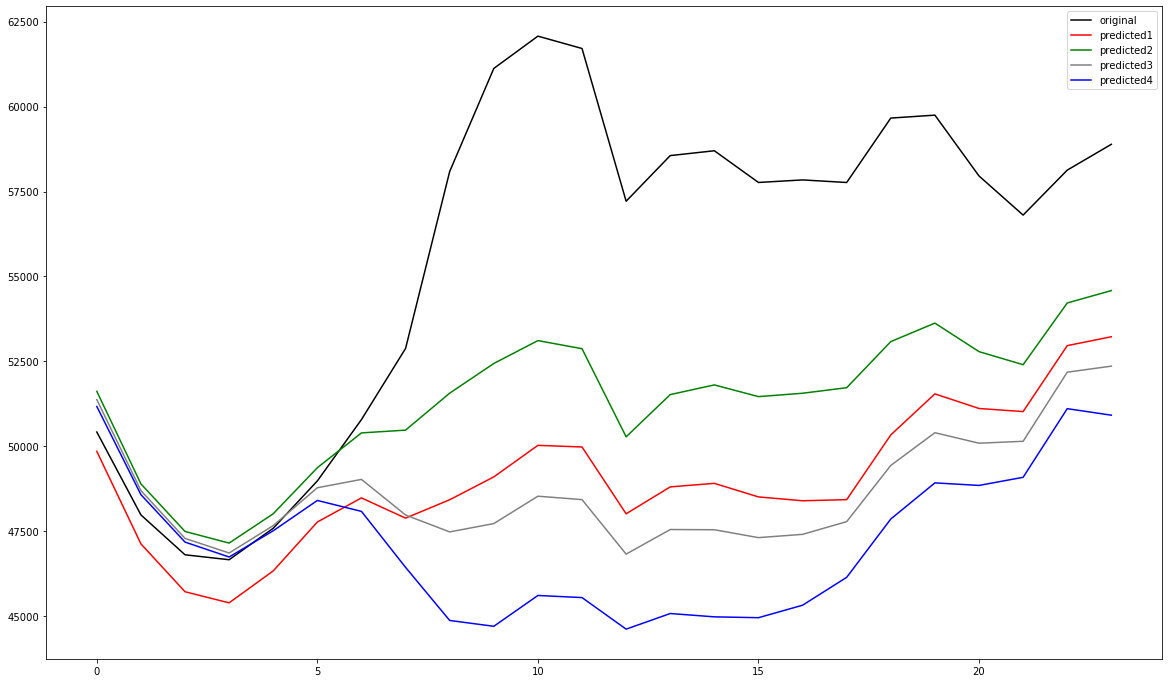

In [25]:
x_ax=range(24)
plt.figure(figsize=(20,12))
plt.plot(x_ax, test_out[0:1].transpose(), color="black", label="original")
plt.plot(x_ax, yhat1.transpose(), lw=1.5, color="red", label="predicted1")

plt.plot(x_ax, yhat2.transpose(), lw=1.5, color="green", label="predicted2")

plt.plot(x_ax, yhat3.transpose(), lw=1.5, color="gray", label="predicted3")

plt.plot(x_ax, yhat4.transpose(), lw=1.5, color="blue", label="predicted4")
plt.legend()
plt.show() 